In [1]:
import openmm as mm
import openmm.app as app
import openmm.unit as unit
import numpy as np
import matplotlib.pyplot as plt
from openits.its import ITSLangevinIntegratorGenerator
from tqdm import trange
from openits.energy_group import create_nonbonded_energy_group

# ITS example

Use log_nk [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


100%|██████████| 100/100 [00:21<00:00,  4.58it/s]


Use log_nk [-2.22008478 -1.95201683 -1.69276422 -1.44191092 -1.19906691 -0.96386615
 -0.73596479 -0.51503946 -0.30078579 -0.09291701  0.10883732  0.30473247
  0.49500959  0.67989669  0.85960955  1.03435252  1.20431928  1.36969356
  1.53064978  1.6873536   1.83996253]


100%|██████████| 100/100 [00:21<00:00,  4.57it/s]


Use log_nk [-3.19698808 -2.81081918 -2.43739625 -2.07611187 -1.72639675 -1.38771673
 -1.05957016 -0.74148543 -0.43301876 -0.13375217  0.15670838  0.43873469
  0.71267784  0.97886968  1.23762407  1.48923814  1.73399339  1.9721567
  2.20398125  2.42970747  2.64956376]


100%|██████████| 100/100 [00:20<00:00,  4.94it/s]


Use log_nk [-3.69456041 -3.2481925  -2.81658231 -2.3990246  -1.99485832 -1.60346318
 -1.22425659 -0.85669078 -0.50025029 -0.15444961  0.18116899  0.50703743
  0.82356357  1.1311329   1.43011005  1.7208402   2.00365033  2.27885044
  2.54673461  2.80758205  3.06165801]


100%|██████████| 100/100 [00:20<00:00,  4.84it/s]


Use log_nk [-4.3767404  -3.84846446 -3.33753892 -2.84314249 -2.36450526 -1.90090477
 -1.45166235 -1.01613988 -0.59373676 -0.18388718  0.21394236  0.60025536
  0.97552743  1.34020817  1.69472299  2.03947469  2.37484499  2.70119591
  3.01887102  3.32819664  3.62948291]


100%|██████████| 100/100 [00:21<00:00,  4.75it/s]


Use log_nk [-4.35067479 -3.82537267 -3.31736906 -2.82584114 -2.35001751 -1.88917424
 -1.44263127 -1.0097491  -0.58992586 -0.18259451  0.21277959  0.59670102
  0.96964635  1.33206611  1.68438649  2.02701103  2.36032209  2.68468221
  3.00043541  3.30790838  3.6074115 ]


100%|██████████| 100/100 [00:21<00:00,  4.69it/s]


Use log_nk [-4.39347836 -3.8627089  -3.34948481 -2.85296696 -2.37236878 -1.90695213
 -1.45602369 -1.01893156 -0.59506228 -0.18383796  0.2152862   0.60282428
  0.97926175  1.34505747  1.70064545  2.04643653  2.38281991  2.71016455
  3.02882049  3.33912002  3.6413788 ]


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


Use log_nk [-4.59516862 -4.03940132 -3.50208456 -2.98234226 -2.47935272 -1.9923444
 -1.52059212 -1.06341364 -0.62016648 -0.19024506  0.22692196  0.63187403
  1.02512096  1.40714493  1.77840233  2.13932548  2.49032421  2.83178729
  3.16408377  3.48756425  3.80256197]


100%|██████████| 100/100 [00:21<00:00,  4.66it/s]


Use log_nk [-4.4667983  -3.92701185 -3.40508515 -2.90016665 -2.41145792 -1.93820955
 -1.47971746 -1.03531947 -0.60439222 -0.18634841  0.21936585  0.61327336
  0.99586795  1.36761655  1.72896093  2.08031939  2.42208835  2.75464369
  3.07834213  3.3935224   3.70050637]


100%|██████████| 100/100 [00:21<00:00,  4.71it/s]


Use log_nk [-4.30295435 -3.78287809 -3.28003396 -2.7935978  -2.32279693 -1.86690617
 -1.42524427 -0.99717057 -0.5820821  -0.17941076  0.21137909  0.59079297
  0.95930834  1.31737656  1.66542459  2.00385667  2.33305577  2.653385
  2.96518889  3.26879451  3.56451261]


100%|██████████| 100/100 [00:21<00:00,  4.65it/s]

Use log_nk [-4.43860015 -3.90227263 -3.38369996 -2.88203093 -2.39646765 -1.92626143
 -1.47070905 -1.02914935 -0.60096018 -0.18555552  0.21761708  0.60907885
  0.989322    1.35881171  1.71798793  2.06726708  2.40704362  2.73769144
  3.05956521  3.37300159  3.67832034]


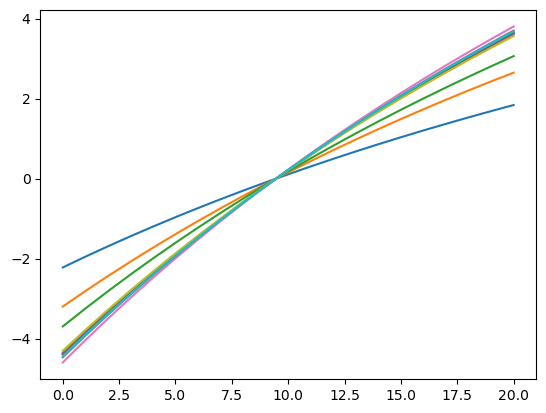

In [3]:
pdb = app.PDBFile("loop.pdb")
forcefield = app.ForceField("amber14-all.xml", "implicit/gbn2.xml")
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.NoCutoff, constraints=app.HBonds)
# system.addForce(mm.MonteCarloBarostat(1*unit.atmosphere, 300*unit.kelvin, 25))


# Define the temperature list
temp_list = np.arange(300, 401, 5)
int_gen = ITSLangevinIntegratorGenerator(temp_list, 2.0, 0.002)
log_nk_list = []

start_state = None
for nloop in range(10):
    simulation = app.Simulation(pdb.topology, system, int_gen.integrator)
    if start_state is None:
        simulation.context.setPositions(pdb.positions)
        simulation.context.setVelocitiesToTemperature(300*unit.kelvin)
    else:
        simulation.context.setPeriodicBoxVectors(*start_state.getPeriodicBoxVectors())
        simulation.context.setPositions(start_state.getPositions())
        simulation.context.setVelocities(start_state.getVelocities())
    simulation.minimizeEnergy()
    energy_list = []
    for nstep in trange(100):
        simulation.step(250)
        state = simulation.context.getState(getEnergy=True)
        energy_list.append(state.getPotentialEnergy().value_in_unit(unit.kilojoule_per_mole))
    energy_list = np.array(energy_list)
    int_gen.update_nk(energy_list, ratio=0.5)
    log_nk_list.append(int_gen.log_nk)
    start_state = simulation.context.getState(getPositions=True, getVelocities=True)

    plt.plot(log_nk_list[-1])

# SITS example

Use log_nk [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


100%|██████████| 100/100 [00:23<00:00,  4.28it/s]


Use log_nk [-5.69910185 -5.01202904 -4.34746281 -3.70432152 -3.08159137 -2.4783212
 -1.89361773 -1.32664125 -0.77660168 -0.24275498  0.27560013  0.77912523
  1.2684449   1.74414931  2.20679649  2.65691455  3.09500359  3.52153756
  3.93696593  4.34171523  4.73619052]


100%|██████████| 100/100 [00:23<00:00,  4.32it/s]


Use log_nk [-8.89742917 -7.82544414 -6.78843201 -5.7847209  -4.81274348 -3.87102893
 -2.95819564 -2.07294457 -1.21405314 -0.38036977  0.42919127  1.21565442
  1.97998714  2.72310379  3.44586921  4.14910203  4.83357771  5.50003134
  6.14916023  6.7816263   7.39805829]


100%|██████████| 100/100 [00:23<00:00,  4.29it/s]


Use log_nk [-10.29817688  -9.0573705   -7.85705333  -6.6952901   -5.57026645
  -4.48027968  -3.42373029  -2.39911428  -1.40501618  -0.44010258
   0.49688368   1.40712886   2.29175329   3.15181583   3.98831804
   4.80220799   5.59438378   6.3656968    7.11695468   7.84892407
   8.56233324]


100%|██████████| 100/100 [00:20<00:00,  4.77it/s]


Use log_nk [-11.11901536  -9.77797414  -8.48089888  -7.2256917   -6.01038511
  -4.833132    -3.69219659  -2.58594615  -1.51284347  -0.47144
   0.53963048   1.52165758   2.47585959   3.40338831   4.30533356
   5.18272719   6.03654695   6.86771991   7.67712569   8.46559946
   9.23393467]


100%|██████████| 100/100 [00:21<00:00,  4.73it/s]


Use log_nk [-11.59082559 -10.19387675  -8.8425708   -7.53472793  -6.26830428
  -5.04138147  -3.85215713  -2.69893629  -1.58012347  -0.4942155
   0.56020503   1.58447581   2.57986032   3.5475529    4.48868337
   5.40432137   6.29548026   7.16312076   8.00815436   8.83144633
   9.6338187 ]


100%|██████████| 100/100 [00:21<00:00,  4.63it/s]


Use log_nk [-12.00425161 -10.55755183  -9.15810655  -7.80365922  -6.49209405
  -5.22142526  -3.98978719  -2.79542541  -1.63668849  -0.51202065
   0.58004515   1.6408934    2.67183173   3.6740962    4.64885613
   5.59721848   6.52023199   7.41889093   8.29413858   9.14687044
   9.97793723]


100%|██████████| 100/100 [00:21<00:00,  4.58it/s]


Use log_nk [-12.03037013 -10.58076688  -9.17848222  -7.82125401  -6.50696148
  -5.23361438  -3.99934305  -2.80238951  -1.64109919  -0.51391348
   0.58063715   1.64393936   2.67730274   3.68196505   4.65909709
   5.60980715   6.5351451    7.4361062    8.31363459   9.16862654
  10.00193338]


100%|██████████| 100/100 [00:22<00:00,  4.50it/s]


Use log_nk [-11.91190887 -10.47628704  -9.08757571  -7.74353215  -6.44205372
  -5.18116703  -3.95901823  -2.77386409  -1.62406385  -0.50807187
   0.57556919   1.62823458   2.65122309   3.64576236   4.61301359
   5.55407603   6.469991     7.36174567   8.23027651   9.07647249
   9.90117805]


100%|██████████| 100/100 [00:21<00:00,  4.69it/s]


Use log_nk [-11.80131615 -10.37850063  -9.0022965   -7.67046602  -6.38091154
  -5.13166478  -3.92087706  -2.74681037  -1.60782927  -0.50239346
   0.570949     1.61356791   2.62675663   3.6117373    4.56966566
   5.50163552   6.40868275   7.29178911   8.15188573   8.98985626
   9.80653991]


100%|██████████| 100/100 [00:21<00:00,  4.64it/s]

Use log_nk [-12.18349379 -10.7153193   -9.29505115  -7.92040704  -6.58924745
  -5.29956472  -4.04947299  -2.83719915  -1.66107449  -0.51952714
   0.58892485   1.6656799    2.7120587    3.72930952   4.71861321
   5.68108761   6.6177918    7.5297299    8.41785458   9.28307039
  10.12623676]


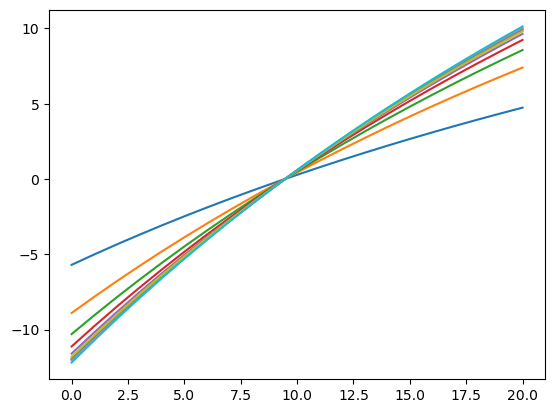

In [4]:
pdb = app.PDBFile("loop.pdb")
forcefield = app.ForceField("amber14-all.xml", "implicit/gbn2.xml")
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.NoCutoff, constraints=app.HBonds)
# system.addForce(mm.MonteCarloBarostat(1*unit.atmosphere, 300*unit.kelvin, 25))
for force in system.getForces():
    if isinstance(force, mm.CustomGBForce) or isinstance(force, mm.NonbondedForce):
        force.setForceGroup(1)
    else:
        force.setForceGroup(0)

# Define the temperature list
temp_list = np.arange(300, 401, 5)
int_gen = ITSLangevinIntegratorGenerator(temp_list, 2.0, 0.002, boost_e1_only=True)
log_nk_list = []

start_state = None
for nloop in range(10):
    simulation = app.Simulation(pdb.topology, system, int_gen.integrator)
    if start_state is None:
        simulation.context.setPositions(pdb.positions)
        simulation.context.setVelocitiesToTemperature(300*unit.kelvin)
    else:
        simulation.context.setPeriodicBoxVectors(*start_state.getPeriodicBoxVectors())
        simulation.context.setPositions(start_state.getPositions())
        simulation.context.setVelocities(start_state.getVelocities())
    simulation.minimizeEnergy()
    energy_list = []
    for nstep in trange(100):
        simulation.step(250)
        state = simulation.context.getState(getEnergy=True, groups={1})
        energy_list.append(state.getPotentialEnergy().value_in_unit(unit.kilojoule_per_mole))
    energy_list = np.array(energy_list)
    int_gen.update_nk(energy_list, ratio=0.5)
    log_nk_list.append(int_gen.log_nk)
    start_state = simulation.context.getState(getPositions=True, getVelocities=True)

    plt.plot(log_nk_list[-1])

# Boost protein-water interaction in SITS

Use log_nk [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


100%|██████████| 100/100 [00:54<00:00,  1.82it/s]


Use log_nk [-5.56884037 -4.89911231 -4.25101417 -3.6235176  -3.01565853 -2.42653229
 -1.85528903 -1.30112968 -0.7633022  -0.24109816  0.26615037  0.75907369
  1.23826703  1.70429305  2.15768395  2.59894355  3.02854916  3.44695328
  3.85458523  4.25185256  4.63914248]


100%|██████████| 100/100 [00:50<00:00,  1.99it/s]


Use log_nk [-9.95654605 -8.75940411 -7.60089293 -6.47917381 -5.39252301 -4.33932288
 -3.31805383 -2.32728701 -1.36567763 -0.4319589   0.47506358  1.35651693
  2.2134656   3.04691574  3.85781906  4.64707654  5.41554173  6.1640238
  6.89329044  7.60407048  8.29705627]


100%|██████████| 100/100 [00:49<00:00,  2.02it/s]


Use log_nk [-13.47358281 -11.85350907 -10.28572049  -8.76772889  -7.29720166
  -5.87194976  -4.48991687  -3.14916946  -1.84788777  -0.58435756
   0.64303744   1.8358224    2.99543775   4.12324496   5.22053191
   6.28851776   7.3283575    8.3411461    9.32792239  10.28967258
  11.22733354]


100%|██████████| 100/100 [00:49<00:00,  2.01it/s]


Use log_nk [-16.04543832 -14.11566112 -12.24823929 -10.44020536  -8.68877731
  -6.99134427  -5.34545357  -3.74879894  -2.19920977  -0.69464122
   0.76683471   2.18703742   3.56768525   4.91040242   6.21672535
   7.48810854   8.72592997   9.93149603  11.10604614  12.25075696
  13.36674636]


100%|██████████| 100/100 [00:49<00:00,  2.01it/s]


Use log_nk [-18.03681253 -15.8670692  -13.76751414 -11.73480623  -9.76581305
  -7.85759482  -6.00738984  -4.21260121  -2.47078469  -0.77963766
   0.863011     2.45921014   4.01089486   5.51989427   6.98793866
   8.41666609   9.80762843  11.16229698  12.48206761  13.76826555
  15.02214979]


100%|██████████| 100/100 [00:49<00:00,  2.01it/s]


Use log_nk [-20.29945391 -17.85829267 -15.49597863 -13.20875796 -10.99311137
  -8.84573612  -6.76352962  -4.74357443  -2.78312475  -0.8795939
   0.969457     2.76632945   4.5131971    6.2121145    7.86502516
   9.47376894  11.04008887  12.56563743  14.05198238  15.50061207
  16.91294045]


100%|██████████| 100/100 [00:49<00:00,  2.01it/s]


Use log_nk [-21.24409551 -18.68855478 -16.21569397 -13.82157363 -11.50250047
  -9.25500841  -7.07584141  -4.96193777  -2.91041589  -0.9185612
   1.01618574   2.89624018   4.72388318   6.50127077   8.23044243
   9.91332883  11.55175899  13.1474669   14.70209756  16.21721267
  17.69429576]


100%|██████████| 100/100 [00:50<00:00,  1.99it/s]


Use log_nk [-21.92798078 -19.2903966  -16.73811026 -14.2670575  -11.87342806
  -9.55364621  -7.30435294  -5.12238983  -3.00478432  -0.94873619
   1.0483947    2.98909968   4.87573162   6.71051442   8.49555166
  10.23283471  11.92425003  13.57158603  15.17653934  16.74072061
  18.26565989]


100%|██████████| 100/100 [00:49<00:00,  2.01it/s]


Use log_nk [-22.60555846 -19.88614782 -17.25471814 -14.70708111 -12.23931008
  -9.84771991  -7.5288487   -5.2794411   -3.09643317  -0.97693849
   1.08176451   3.08224413   5.0269261    6.91810327   8.75794463
  10.54850354  12.29172535  13.98945439  15.64344048  17.25534484
  18.82674571]


100%|██████████| 100/100 [00:49<00:00,  2.01it/s]

Use log_nk [-23.38644938 -20.57362208 -17.8517168  -15.21640462 -12.66362705
 -10.18957531  -7.79067134  -5.46355067  -3.20504666  -1.01217618
   1.11787347   3.18775656   5.19997994   7.15691316   9.06079768
  10.91375545  12.71779676  14.47482748  16.18665576  17.85499821
  19.48148562]


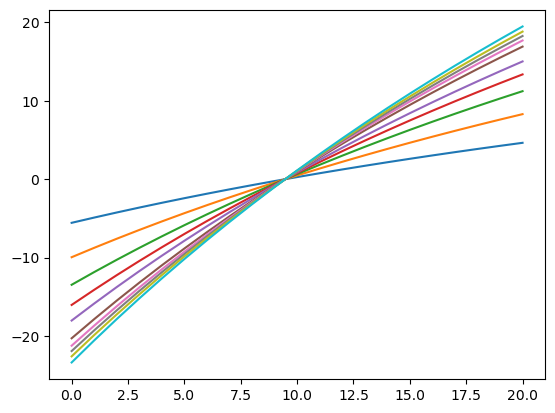

In [3]:
pdb = app.PDBFile("system.pdb")
forcefield = app.ForceField("amber14-all.xml", "amber14/tip3p.xml")
system = forcefield.createSystem(pdb.topology, nonbondedMethod=app.PME, nonbondedCutoff=1.1*unit.nanometer, constraints=app.HBonds)
system.addForce(mm.MonteCarloBarostat(1*unit.atmosphere, 300*unit.kelvin, 25))

group1, group2 = [], []
for res in pdb.topology.residues():
    for atom in res.atoms():
        if atom.index < 32:
            group1.append(atom.index)
        else:
            group2.append(atom.index)
create_nonbonded_energy_group(system, group1, group2)

# Define the temperature list
temp_list = np.arange(300, 401, 5)
int_gen = ITSLangevinIntegratorGenerator(temp_list, 2.0, 0.002, boost_e1_only=True)
log_nk_list = []

start_state = None
for nloop in range(10):
    simulation = app.Simulation(pdb.topology, system, int_gen.integrator)
    if start_state is None:
        simulation.context.setPositions(pdb.positions)
        simulation.context.setVelocitiesToTemperature(300*unit.kelvin)
    else:
        simulation.context.setPeriodicBoxVectors(*start_state.getPeriodicBoxVectors())
        simulation.context.setPositions(start_state.getPositions())
        simulation.context.setVelocities(start_state.getVelocities())
    simulation.minimizeEnergy()
    energy_list = []
    for nstep in trange(100):
        simulation.step(250)
        state = simulation.context.getState(getEnergy=True, groups={1})
        energy_list.append(state.getPotentialEnergy().value_in_unit(unit.kilojoule_per_mole))
    energy_list = np.array(energy_list)
    int_gen.update_nk(energy_list, ratio=0.5)
    log_nk_list.append(int_gen.log_nk)
    start_state = simulation.context.getState(getPositions=True, getVelocities=True)

    plt.plot(log_nk_list[-1])

2586

2585